<a href="https://colab.research.google.com/github/sfeldmanMIG25/Feldman-Investigating_Tour_Length_Estimators_to_Solve_Vehicle_Routing_Problem/blob/main/TSPEstimator_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of the TSP Estimator Benchmarking (Vinel, Cavdar, GART, Composite)

In [1]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  excel_file_path = fn
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

try:
    df = pd.read_excel(excel_file_path)
    print("DataFrame created successfully.")
    print("\nHeader of the DataFrame:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Saving benchmark_results.xlsx to benchmark_results.xlsx
User uploaded file "benchmark_results.xlsx" with length 252752 bytes
DataFrame created successfully.

Header of the DataFrame:


,Instance,N,Distribution,clust_n,clust_rad,True_LKH_Cost,Vinel_Est,Cavdar_Est,Composite_Est,ML_Alpha_Est,ML_Alpha_Beta_Est,Feldman_Est,Vinel_Diff_%,Cavdar_Diff_%,Composite_Diff_%,ML_Alpha_Diff_%,ML_Alpha_Beta_Diff_%,Feldman_Diff_%
0,TSP-boundary-n10-4,10,boundary,NaN,NaN,3282.5618,3282.562196,3282.562196,3282.562196,3282.562196,3282.562196,3282.562196,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
1,TSP-boundary-n10-1,10,boundary,NaN,NaN,3291.2396,3291.244672,3291.244672,3291.244672,3291.244672,3291.244672,3291.244672,0.000154,0.000154,0.000154,0.000154,0.000154,0.000154
2,TSP-boundary-n10-5,10,boundary,NaN,NaN,3153.0047,3153.002144,3153.002144,3153.002144,3153.002144,3153.002144,3153.002144,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081,-0.000081
3,TSP-boundary-n10-2,10,boundary,NaN,NaN,2980.0334,2980.043741,2980.043741,2980.043741,2980.043741,2980.043741,2980.043741,0.000347,0.000347,0.000347,0.000347,0.000347,0.000347
4,TSP-boundary-n10-3,10,boundary,NaN,NaN,3102.5159,3102.512945,3102.512945,3102.512945,3102.512945,3102.512945,3102.512945,-0.000095,-0.000095,-0.000095,-0.000095,-0.000095,-0.000095


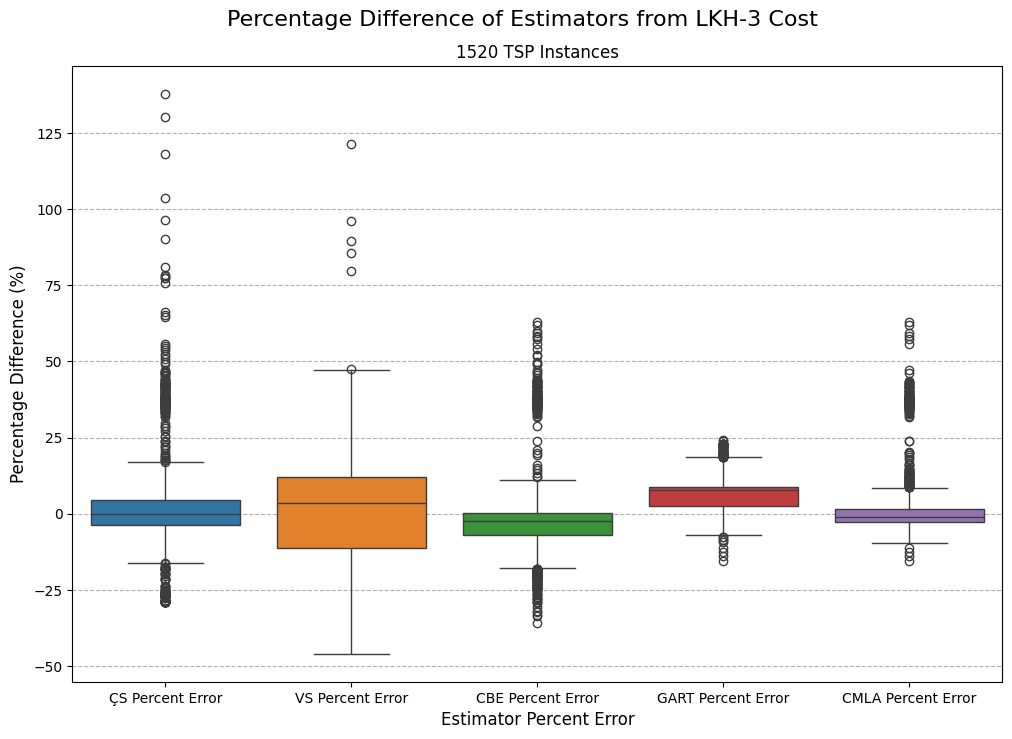

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data where N > 10
df_filtered = df[df['N'] > 10].copy()

# Rename columns
df_filtered.rename(columns={'Composite_Est': 'CBE_Est',
                           'ML_Alpha_Est': 'GART_Est',
                           'Composite_Diff_%': 'CBE Percent Error',
                           'ML_Alpha_Diff_%': 'GART Percent Error',
                            'Feldman_Est': 'CMLA_Est',
                            'Feldman_Diff_%': 'CMLA Percent Error',
                            'Cavdar_Diff_%': 'ÇS Percent Error',
                            'Vinel_Diff_%': 'VS Percent Error',

                           }, inplace=True)


# Select columns for box plots
diff_columns = ['ÇS Percent Error', 'VS Percent Error', 'CBE Percent Error', 'GART Percent Error','CMLA Percent Error']

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered[diff_columns], showfliers=True)
plt.title(str(len(df_filtered))+' TSP Instances', fontsize=12)
plt.suptitle('Percentage Difference of Estimators from LKH-3 Cost', fontsize=16, y=0.95)
plt.ylabel('Percentage Difference (%)', fontsize=12)
plt.xlabel('Estimator Percent Error', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

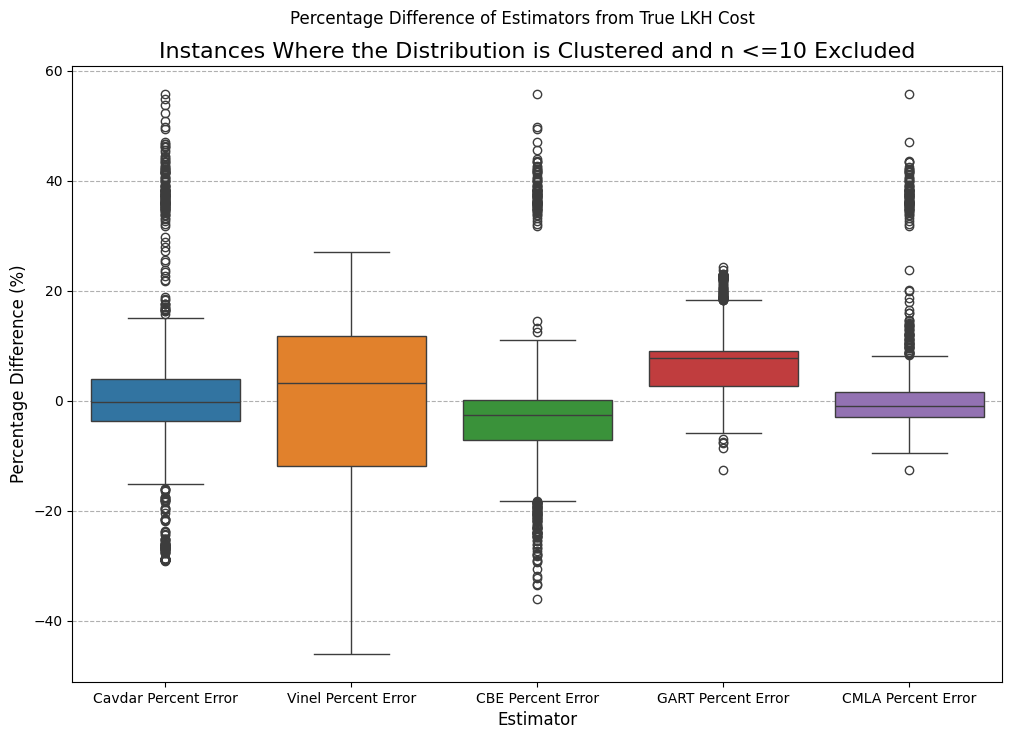

In [ ]:
# Filter data where N > 10 and distribution is not 'clustered'
df_filtered_no_clustered = df[(df['N'] > 10) & (df['Distribution'] != 'clustered')].copy()

# Rename columns for the new filtered dataframe
df_filtered_no_clustered.rename(columns={'Composite_Est': 'CBE_Est',
                           'ML_Alpha_Est': 'GART_Est',
                           'Composite_Diff_%': 'CBE Percent Error',
                           'ML_Alpha_Diff_%': 'GART Percent Error',
                            'Feldman_Est': 'CMLA_Est',
                            'Feldman_Diff_%': 'CMLA Percent Error',
                            'Cavdar_Diff_%': 'Cavdar Percent Error',
                            'Vinel_Diff_%': 'Vinel Percent Error',
                           }, inplace=True)
# Select columns for box plots
diff_columns = ['Cavdar Percent Error', 'Vinel Percent Error', 'CBE Percent Error', 'GART Percent Error','CMLA Percent Error']

# Create box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered_no_clustered[diff_columns], showfliers=True)
plt.title('Instances Where the Distribution is Clustered and n <=10 Excluded', fontsize=16)
plt.suptitle('Percentage Difference of Estimators from True LKH Cost', fontsize=12, y=0.95)
plt.ylabel('Percentage Difference (%)', fontsize=12)
plt.xlabel('Estimator', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
import numpy as np
from scipy import stats

# Function to calculate confidence interval
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data.dropna())
    n = len(a)
    if n == 0:
        return np.nan, np.nan, np.nan
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# Select columns for summary statistics
# Updated column names to match the renamed columns in df_filtered and df_filtered_no_clustered
diff_columns = ['Vinel Percent Error', 'Cavdar Percent Error', 'CBE Percent Error', 'GART Percent Error', 'CMLA Percent Error']


# Summary statistics for df_filtered (N > 10)
print("Summary Statistics (N > 10):")
summary_stats_filtered = {}
for col in diff_columns:
    mean_val, ci_lower, ci_upper = mean_confidence_interval(df_filtered[col])
    summary_stats_filtered[col] = {
        'Mean': df_filtered[col].mean(),
        'Median': df_filtered[col].median(),
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Standard Deviation': df_filtered[col].std() # Replace variance with standard deviation
    }
    print(f"\n{col}:")
    print(f"  Mean: {summary_stats_filtered[col]['Mean']:.2f}")
    print(f"  Median: {summary_stats_filtered[col]['Median']:.2f}")
    print(f"  Standard Deviation: {summary_stats_filtered[col]['Standard Deviation']:.2f}") # Print standard deviation
    print(f"  95% CI: ({summary_stats_filtered[col]['CI_Lower']:.2f}, {summary_stats_filtered[col]['CI_Upper']:.2f})")


print("\n" + "="*50 + "\n")

# Summary statistics for df_filtered_no_clustered (N > 10, excluding clustered)
print("Summary Statistics (N > 10, Excluding Clustered Distributions):")
summary_stats_no_clustered = {}
for col in diff_columns:
    mean_val, ci_lower, ci_upper = mean_confidence_interval(df_filtered_no_clustered[col])
    summary_stats_no_clustered[col] = {
        'Mean': df_filtered_no_clustered[col].mean(),
        'Median': df_filtered_no_clustered[col].median(),
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Standard Deviation': df_filtered_no_clustered[col].std() # Replace variance with standard deviation
    }
    print(f"\n{col}:")
    print(f"  Mean: {summary_stats_no_clustered[col]['Mean']:.2f}")
    print(f"  Median: {summary_stats_no_clustered[col]['Median']:.2f}")
    print(f"  Standard Deviation: {summary_stats_no_clustered[col]['Standard Deviation']:.2f}") # Print standard deviation
    print(f"  95% CI: ({summary_stats_no_clustered[col]['CI_Lower']:.2f}, {summary_stats_no_clustered[col]['CI_Upper']:.2f})")

Summary Statistics (N > 10):

Vinel Percent Error:
  Mean: 0.22
  Median: 3.65
  Standard Deviation: 16.86
  95% CI: (-0.63, 1.07)

Cavdar Percent Error:
  Mean: 2.90
  Median: -0.11
  Standard Deviation: 17.28
  95% CI: (2.03, 3.77)

CBE Percent Error:
  Mean: -1.31
  Median: -2.58
  Standard Deviation: 14.23
  95% CI: (-2.03, -0.60)

GART Percent Error:
  Mean: 6.94
  Median: 7.71
  Standard Deviation: 6.17
  95% CI: (6.63, 7.25)

CMLA Percent Error:
  Mean: 2.03
  Median: -0.97
  Standard Deviation: 10.94
  95% CI: (1.48, 2.59)


Summary Statistics (N > 10, Excluding Clustered Distributions):

Vinel Percent Error:
  Mean: -0.75
  Median: 3.28
  Standard Deviation: 15.38
  95% CI: (-1.54, 0.03)

Cavdar Percent Error:
  Mean: 1.63
  Median: -0.28
  Standard Deviation: 14.46
  95% CI: (0.89, 2.36)

CBE Percent Error:
  Mean: -2.31
  Median: -2.64
  Standard Deviation: 12.63
  95% CI: (-2.95, -1.66)

GART Percent Error:
  Mean: 7.11
  Median: 7.75
  Standard Deviation: 6.07
  95% CI: (6

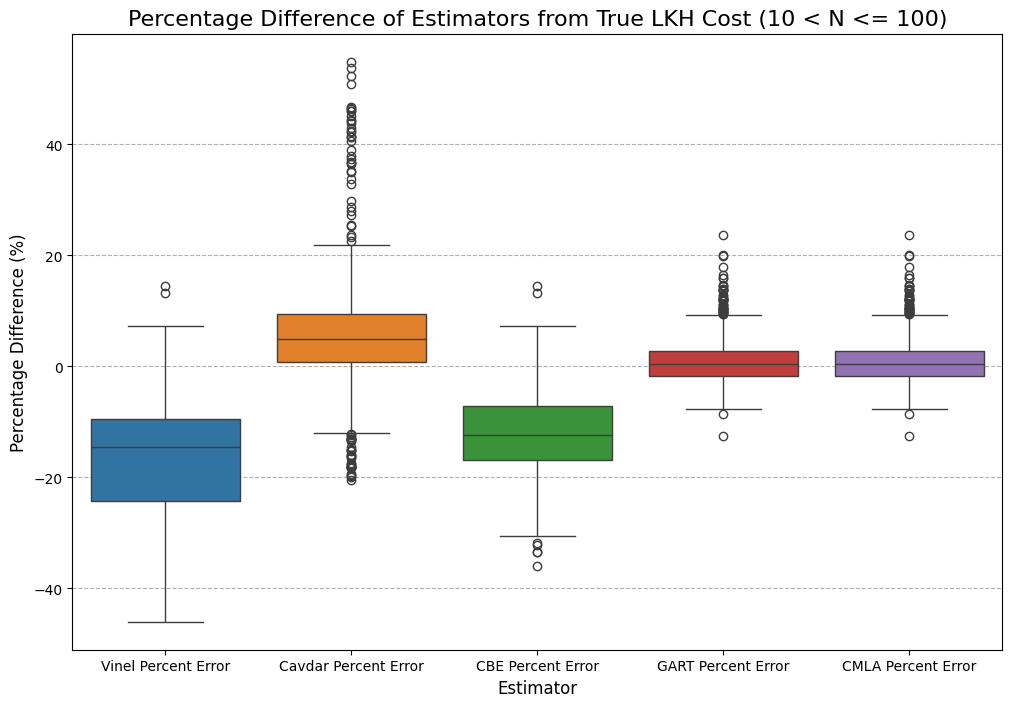

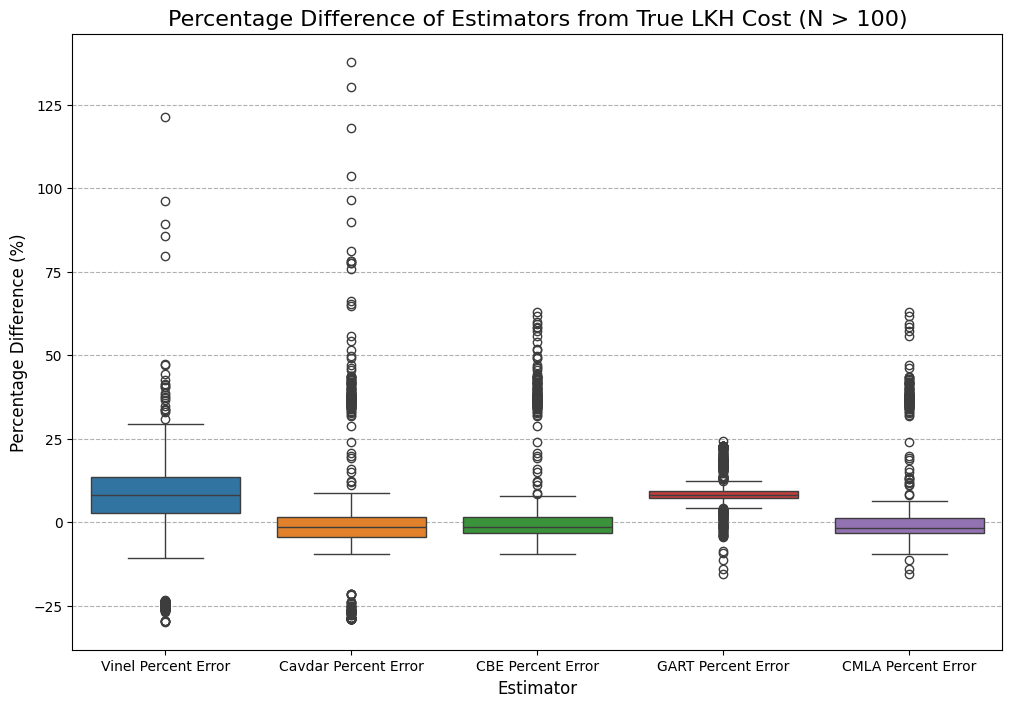

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for N > 10 and N <= 100
df_n_10_100 = df[(df['N'] > 10) & (df['N'] < 100)].copy()

# Filter data for N > 100
df_n_gt_100 = df[df['N'] >= 100].copy()

# Rename columns for both new filtered dataframes
df_n_10_100.rename(columns={'Composite_Est': 'CBE_Est',
                           'ML_Alpha_Est': 'GART_Est',
                           'Composite_Diff_%': 'CBE Percent Error',
                           'ML_Alpha_Diff_%': 'GART Percent Error',
                            'Feldman_Est': 'CMLA_Est',
                            'Feldman_Diff_%': 'CMLA Percent Error',
                            'Cavdar_Diff_%': 'Cavdar Percent Error',
                            'Vinel_Diff_%': 'Vinel Percent Error',
                           }, inplace=True)

df_n_gt_100.rename(columns={'Composite_Est': 'CBE_Est',
                           'ML_Alpha_Est': 'GART_Est',
                           'Composite_Diff_%': 'CBE Percent Error',
                           'ML_Alpha_Diff_%': 'GART Percent Error',
                            'Feldman_Est': 'CMLA_Est',
                            'Feldman_Diff_%': 'CMLA Percent Error',
                            'Cavdar_Diff_%': 'Cavdar Percent Error',
                            'Vinel_Diff_%': 'Vinel Percent Error',
                           }, inplace=True)

# Select columns for box plots
diff_columns = ['Vinel Percent Error', 'Cavdar Percent Error', 'CBE Percent Error', 'GART Percent Error', 'CMLA Percent Error']

# Create box plot for 10 < N <= 100
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_n_10_100[diff_columns], showfliers=True)
plt.title('Percentage Difference of Estimators from True LKH Cost (10 < N <= 100)', fontsize=16)
plt.ylabel('Percentage Difference (%)', fontsize=12)
plt.xlabel('Estimator', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

# Create box plot for N > 100
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_n_gt_100[diff_columns], showfliers=True)
plt.title('Percentage Difference of Estimators from True LKH Cost (N > 100)', fontsize=16)
plt.ylabel('Percentage Difference (%)', fontsize=12)
plt.xlabel('Estimator', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()

In [ ]:
import numpy as np
from scipy import stats

# Assuming the mean_confidence_interval function is already defined in a previous cell
# If not, include the function definition here:
# def mean_confidence_interval(data, confidence=0.95):
#     a = 1.0 * np.array(data.dropna())
#     n = len(a)
#     if n == 0:
#         return np.nan, np.nan, np.nan
#     m, se = np.mean(a), stats.sem(a)
#     h = se * stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h

# Select columns for summary statistics
# Updated column names to match the renamed columns in df_n_10_100 and df_n_gt_100
diff_columns = ['Vinel Percent Error', 'Cavdar Percent Error', 'CBE Percent Error', 'GART Percent Error', 'CMLA Percent Error']

# Summary statistics for df_n_10_100 (10 < N <= 100)
print("Summary Statistics (10 < N <= 100):")
summary_stats_n_10_100 = {}
for col in diff_columns:
    mean_val, ci_lower, ci_upper = mean_confidence_interval(df_n_10_100[col])
    summary_stats_n_10_100[col] = {
        'Mean': df_n_10_100[col].mean(),
        'Median': df_n_10_100[col].median(),
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Standard Deviation': df_n_10_100[col].std()
    }
    print(f"\n{col}:")
    print(f"  Mean: {summary_stats_n_10_100[col]['Mean']:.2f}")
    print(f"  Median: {summary_stats_n_10_100[col]['Median']:.2f}")
    print(f"  Standard Deviation: {summary_stats_n_10_100[col]['Standard Deviation']:.2f}")
    print(f"  95% CI: ({summary_stats_n_10_100[col]['CI_Lower']:.2f}, {summary_stats_n_10_100[col]['CI_Upper']:.2f})")


print("\n" + "="*50 + "\n")

# Summary statistics for df_n_gt_100 (N > 100)
print("Summary Statistics (N > 100):")
summary_stats_n_gt_100 = {}
for col in diff_columns:
    mean_val, ci_lower, ci_upper = mean_confidence_interval(df_n_gt_100[col])
    summary_stats_n_gt_100[col] = {
        'Mean': df_n_gt_100[col].mean(),
        'Median': df_n_gt_100[col].median(),
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper,
        'Standard Deviation': df_n_gt_100[col].std()
    }
    print(f"\n{col}:")
    print(f"  Mean: {summary_stats_n_gt_100[col]['Mean']:.2f}")
    print(f"  Median: {summary_stats_n_gt_100[col]['Median']:.2f}")
    print(f"  Standard Deviation: {summary_stats_n_gt_100[col]['Standard Deviation']:.2f}")
    print(f"  95% CI: ({summary_stats_n_gt_100[col]['CI_Lower']:.2f}, {summary_stats_n_gt_100[col]['CI_Upper']:.2f})")

Summary Statistics (10 < N <= 100):

Vinel Percent Error:
  Mean: -16.45
  Median: -14.48
  Standard Deviation: 10.51
  95% CI: (-17.44, -15.47)

Cavdar Percent Error:
  Mean: 6.39
  Median: 4.90
  Standard Deviation: 12.95
  95% CI: (5.18, 7.61)

CBE Percent Error:
  Mean: -12.30
  Median: -12.37
  Standard Deviation: 7.75
  95% CI: (-13.03, -11.58)

GART Percent Error:
  Mean: 1.46
  Median: 0.50
  Standard Deviation: 4.97
  95% CI: (0.99, 1.92)

CMLA Percent Error:
  Mean: 1.46
  Median: 0.50
  Standard Deviation: 4.97
  95% CI: (0.99, 1.92)


Summary Statistics (N > 100):

Vinel Percent Error:
  Mean: 7.01
  Median: 8.18
  Standard Deviation: 14.00
  95% CI: (6.17, 7.85)

Cavdar Percent Error:
  Mean: 1.48
  Median: -1.56
  Standard Deviation: 18.58
  95% CI: (0.37, 2.59)

CBE Percent Error:
  Mean: 3.17
  Median: -1.53
  Standard Deviation: 13.84
  95% CI: (2.34, 3.99)

GART Percent Error:
  Mean: 9.17
  Median: 8.21
  Standard Deviation: 5.13
  95% CI: (8.86, 9.48)

CMLA Percent 

# Task
Analyze the variance of the results where n>10. Test the assumptions for common tests of variance (cumulative between Vinel, Cavdar, CBE, GART, CMLA), then do an Indepth test for the variance to see which variance is the statistical significantly better. Make sure to write out all assumptions and to test them to verify.

## Filter data

### Subtask:
Filter the DataFrame to include only instances where `N > 10`.


**Reasoning**:
Filter the DataFrame to include only instances where N > 10 and display the head of the filtered DataFrame.



In [ ]:
df_filtered_n_gt_10 = df[df['N'] > 10].copy()
display(df_filtered_n_gt_10.head())

,Instance,N,Distribution,clust_n,clust_rad,True_LKH_Cost,Vinel_Est,Cavdar_Est,Composite_Est,ML_Alpha_Est,ML_Alpha_Beta_Est,Feldman_Est,Vinel_Diff_%,Cavdar_Diff_%,Composite_Diff_%,ML_Alpha_Diff_%,ML_Alpha_Beta_Diff_%,Feldman_Diff_%
5,TSP-boundary-n20-2,20,boundary,NaN,NaN,3918.2808,3082.506109,3882.775529,3082.506109,3759.738958,2983.458210,3759.738958,-21.330138,-0.906144,-21.330138,-4.046209,-23.857978,-4.046209
6,TSP-boundary-n20-1,20,boundary,NaN,NaN,3693.1404,3070.705413,3662.367760,3070.705413,3788.616374,3177.271541,3788.616374,-16.853813,-0.833238,-16.853813,2.585225,-13.968298,2.585225
7,TSP-boundary-n20-3,20,boundary,NaN,NaN,4280.7735,3183.423719,3991.073419,3356.511011,4311.644499,3489.990747,4311.644499,-25.634381,-6.767470,-21.591016,0.721155,-18.472894,0.721155
8,TSP-boundary-n20-5,20,boundary,NaN,NaN,3905.1707,3147.355993,3685.486770,3244.862785,3994.733669,3244.862785,3994.733669,-19.405418,-5.625463,-16.908554,2.293446,-16.908554,2.293446
9,TSP-boundary-n20-4,20,boundary,NaN,NaN,4164.6466,3160.206887,4486.435596,3160.206887,3640.331175,3077.876720,3640.331175,-24.118246,7.726682,-24.118246,-12.589674,-26.095128,-12.589674


In [ ]:
from scipy.stats import shapiro

# Select the relevant percentage error columns from the filtered DataFrame
diff_columns = ['Vinel_Diff_%', 'Cavdar_Diff_%', 'Composite_Diff_%', 'ML_Alpha_Diff_%', 'Feldman_Diff_%']

print("Checking Normality Assumption (Shapiro-Wilk Test) for N > 10:")
for col in diff_columns:
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(df_filtered_n_gt_10[col])

    print(f"\n{col}:")
    print(f"  Shapiro-Wilk Statistic: {stat:.4f}")
    print(f"  P-value: {p_value:.4f}")

    # Interpret the result
    alpha = 0.05
    if p_value > alpha:
        print("  Result: Data looks normally distributed (fail to reject H0)")
    else:
        print("  Result: Data does not look normally distributed (reject H0)")

Checking Normality Assumption (Shapiro-Wilk Test) for N > 10:

Vinel_Diff_%:
  Shapiro-Wilk Statistic: 0.9427
  P-value: 0.0000
  Result: Data does not look normally distributed (reject H0)

Cavdar_Diff_%:
  Shapiro-Wilk Statistic: 0.7828
  P-value: 0.0000
  Result: Data does not look normally distributed (reject H0)

Composite_Diff_%:
  Shapiro-Wilk Statistic: 0.7671
  P-value: 0.0000
  Result: Data does not look normally distributed (reject H0)

ML_Alpha_Diff_%:
  Shapiro-Wilk Statistic: 0.9423
  P-value: 0.0000
  Result: Data does not look normally distributed (reject H0)

Feldman_Diff_%:
  Shapiro-Wilk Statistic: 0.6099
  P-value: 0.0000
  Result: Data does not look normally distributed (reject H0)


In [ ]:
from scipy.stats import levene, fligner

# Select the relevant percentage error columns from the filtered DataFrame
diff_columns = ['Vinel_Diff_%', 'Cavdar_Diff_%', 'Composite_Diff_%', 'ML_Alpha_Diff_%', 'Feldman_Diff_%']

# Prepare data for the tests
data_to_test = [df_filtered_n_gt_10[col].dropna() for col in diff_columns]

# Perform Levene's test
levene_stat, levene_p_value = levene(*data_to_test)

print("Levene's Test for Equality of Variances (N > 10):")
print(f"  Statistic: {levene_stat:.4f}")
print(f"  P-value: {levene_p_value:.4f}")

# Interpret Levene's test result
alpha = 0.05
if levene_p_value > alpha:
    print("  Result: Variances are likely equal (fail to reject H0)")
else:
    print("  Result: Variances are likely unequal (reject H0)")

print("\n" + "="*50 + "\n")

# Perform Fligner-Killeen test
fligner_stat, fligner_p_value = fligner(*data_to_test)

print("Fligner-Killeen Test for Equality of Variances (N > 10):")
print(f"  Statistic: {fligner_stat:.4f}")
print(f"  P-value: {fligner_p_value:.4f}")

# Interpret Fligner-Killeen test result
if fligner_p_value > alpha:
    print("  Result: Variances are likely equal (fail to reject H0)")
else:
    print("  Result: Variances are likely unequal (reject H0)")

Levene's Test for Equality of Variances (N > 10):
  Statistic: 152.6324
  P-value: 0.0000
  Result: Variances are likely unequal (reject H0)


Fligner-Killeen Test for Equality of Variances (N > 10):
  Statistic: 804.8076
  P-value: 0.0000
  Result: Variances are likely unequal (reject H0)


In [ ]:
import pandas as pd
from scipy.stats import fligner
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Corrected import


# Select the relevant percentage error columns from the filtered DataFrame
diff_columns = ['Vinel_Diff_%', 'Cavdar_Diff_%', 'Composite_Diff_%', 'ML_Alpha_Diff_%', 'Feldman_Diff_%']

# Prepare data for pairwise Fligner-Killeen tests
data_for_pairwise = []
labels_for_pairwise = []
for col in diff_columns:
    cleaned_data = df_filtered_n_gt_10[col].dropna()
    data_for_pairwise.append(cleaned_data)
    labels_for_pairwise.extend([col] * len(cleaned_data))

# Perform pairwise Fligner-Killeen tests
print("Pairwise Fligner-Killeen Tests for Equality of Variances (N > 10):")

# Create a DataFrame suitable for pairwise comparisons if needed for other tests
# For Fligner-Killeen pairwise, we iterate through pairs
from itertools import combinations

alpha = 0.05
p_values = []
comparisons = []

for col1, col2 in combinations(diff_columns, 2):
    data1 = df_filtered_n_gt_10[col1].dropna()
    data2 = df_filtered_n_gt_10[col2].dropna()
    if len(data1) > 1 and len(data2) > 1: # Ensure there's enough data for the test
        stat, p_value = fligner(data1, data2)
        p_values.append(p_value)
        comparisons.append(f'{col1} vs {col2}')
        # print(f"{col1} vs {col2}: p-value = {p_value:.4f}")
    else:
        print(f"Skipping comparison between {col1} and {col2} due to insufficient data.")


# Apply a multiple comparison correction (e.g., Bonferroni or Holm)
from statsmodels.sandbox.stats.multicomp import multipletests

reject, corrected_p_values, _, _ = multipletests(p_values, alpha=alpha, method='holm') # Holm correction

print("\nPairwise Fligner-Killeen Tests with Holm Correction:")
for i, comparison in enumerate(comparisons):
    print(f"{comparison}: Corrected p-value = {corrected_p_values[i]:.4f} - {'Reject H0 (Variances Unequal)' if reject[i] else 'Fail to Reject H0 (Variances Equal)'}")

Pairwise Fligner-Killeen Tests for Equality of Variances (N > 10):

Pairwise Fligner-Killeen Tests with Holm Correction:
Vinel_Diff_% vs Cavdar_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Vinel_Diff_% vs Composite_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Vinel_Diff_% vs ML_Alpha_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Vinel_Diff_% vs Feldman_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Cavdar_Diff_% vs Composite_Diff_%: Corrected p-value = 0.0003 - Reject H0 (Variances Unequal)
Cavdar_Diff_% vs ML_Alpha_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Cavdar_Diff_% vs Feldman_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Composite_Diff_% vs ML_Alpha_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
Composite_Diff_% vs Feldman_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
ML_Alpha_Diff_% vs Feldman_Diff_%: Correcte

In [ ]:
from scipy.stats import levene
from itertools import combinations
import numpy as np

# Select the relevant percentage error columns from the filtered DataFrame
diff_columns = ['Vinel_Diff_%', 'Cavdar_Diff_%', 'Composite_Diff_%', 'ML_Alpha_Diff_%', 'Feldman_Diff_%']

print("Pairwise Levene's Tests for Equality of Variances (N > 10):")

alpha = 0.05
p_values_levene = []
comparisons_levene = []

# Calculate variances
variances = {col: np.var(df_filtered_n_gt_10[col].dropna()) for col in diff_columns}

for col1, col2 in combinations(diff_columns, 2):
    data1 = df_filtered_n_gt_10[col1].dropna()
    data2 = df_filtered_n_gt_10[col2].dropna()
    if len(data1) > 1 and len(data2) > 1: # Ensure there's enough data for the test
        stat, p_value = levene(data1, data2)
        p_values_levene.append(p_value)
        comparisons_levene.append(f'{col1} vs {col2}')
    else:
        print(f"Skipping comparison between {col1} and {col2} due to insufficient data.")

# Apply a multiple comparison correction (e.g., Holm)
from statsmodels.sandbox.stats.multicomp import multipletests

reject_levene, corrected_p_values_levene, _, _ = multipletests(p_values_levene, alpha=alpha, method='holm') # Holm correction

print("\nPairwise Levene's Tests with Holm Correction:")
for i, comparison in enumerate(comparisons_levene):
    result = 'Reject H0 (Variances Unequal)' if reject_levene[i] else 'Fail to Reject H0 (Variances Equal)'
    print(f"{comparison}: Corrected p-value = {corrected_p_values_levene[i]:.4f} - {result}")

    if reject_levene[i]:
        col1_name, col2_name = comparison.split(' vs ')
        var1 = variances[col1_name]
        var2 = variances[col2_name]
        if var1 < var2:
            print(f"  {col1_name} has a lower variance ({var1:.4f}) than {col2_name} ({var2:.4f})")
        else:
            print(f"  {col2_name} has a lower variance ({var2:.4f}) than {col1_name} ({var1:.4f})")

print("\nIndividual Variances:")
for col, var in variances.items():
    print(f"{col}: {var:.4f}")

Pairwise Levene's Tests for Equality of Variances (N > 10):

Pairwise Levene's Tests with Holm Correction:
Vinel_Diff_% vs Cavdar_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
  Vinel_Diff_% has a lower variance (284.2164) than Cavdar_Diff_% (298.4431)
Vinel_Diff_% vs Composite_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
  Composite_Diff_% has a lower variance (202.4629) than Vinel_Diff_% (284.2164)
Vinel_Diff_% vs ML_Alpha_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
  ML_Alpha_Diff_% has a lower variance (38.0718) than Vinel_Diff_% (284.2164)
Vinel_Diff_% vs Feldman_Diff_%: Corrected p-value = 0.0000 - Reject H0 (Variances Unequal)
  Feldman_Diff_% has a lower variance (119.6327) than Vinel_Diff_% (284.2164)
Cavdar_Diff_% vs Composite_Diff_%: Corrected p-value = 0.0002 - Reject H0 (Variances Unequal)
  Composite_Diff_% has a lower variance (202.4629) than Cavdar_Diff_% (298.4431)
Cavdar_Diff_% vs ML_Alpha_Diff_%: Corre